In [1]:
%matplotlib inline

In [7]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

In [8]:
cd data/digit-dataset/


[Error 3] The system cannot find the path specified: u'data/digit-dataset/'
C:\Users\wpous\OneDrive\Documents\CS189\hw1\data\digit-dataset


In [11]:
training_digits = io.loadmat("train.mat")
train_images_digits = training_digits['train_images']
train_images_digits = train_images_digits.reshape((28*28,-1)) #reshape so features are flattened to 1d
train_images_digits = train_images_digits.transpose() #transpose so sample number is first dimension

train_labels_digits = training_digits['train_labels']

test_digits = io.loadmat('test.mat')
test_image_digits = test_digits['test_images']
test_image_digits = test_image_digits.transpose() #test images are tranpose of training images for some reason so must tranpose first
test_image_digits = test_image_digits.reshape((28*28,-1))
test_image_digits = test_image_digits.transpose()

In [13]:
cd ..

C:\Users\wpous\OneDrive\Documents\CS189\hw1\data


In [14]:
cd spam-dataset

C:\Users\wpous\OneDrive\Documents\CS189\hw1\data\spam-dataset


In [15]:
spam_data = io.loadmat('spam_data.mat')
spam_training = spam_data['training_data']
spam_training_labels = spam_data['training_labels']
spam_training_labels = spam_training_labels.transpose() #Tranpose so (number, label) shape

spam_test = spam_data['test_data']

In [16]:
import math

#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate #, indices

In [17]:
def problem1(training_digits, training_digit_labels):
    #Inputs are the training digits (correctly flattened and transposed as above) and the corresponding labels
    training_numbers = [100, 200, 500, 1000, 2000, 5000,10000]
    digit_shuffled, digit_labels_shuffled = shuffle(training_digits,training_digit_labels)
    validation_digits = digit_shuffled[10000:20000, :]
    validation_digits_labels = digit_labels_shuffled[10000:20000,0]
    
    digit_prediction_list = []
    validation_errors = []
    
    for number in training_numbers:
        digits_train = digit_shuffled[0:number,:]
        digits_labels = digit_labels_shuffled[0:number, 0]
        digit_classifier = svm.LinearSVC()
        digit_classifier.fit(digits_train, digits_labels)
        
        prediction_labels = digit_classifier.predict(validation_digits)
        digit_prediction_list.append(prediction_labels)

        validation_errors.append(benchmark(prediction_labels, validation_digits_labels))
        
    plt.scatter(training_numbers, validation_errors)
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error rate')
    plt.title('Error Rate for different Digit Training Examples')
    return digit_prediction_list, validation_digits_labels
        

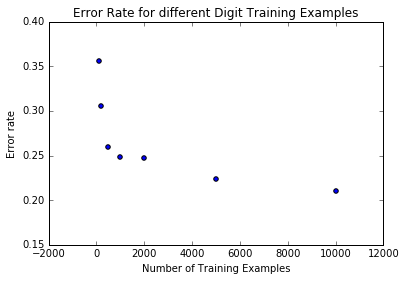

In [18]:
digit_predictions, validation_digit_labels = problem1(train_images_digits, train_labels_digits)

In [19]:
def problem2(digit_predictions, true_labels, training_number):
    #inputs are prediction labels from problem1 and their corresponding true labels, and lastly the number of training examples
    c_matrix = confusion_matrix(true_labels, digit_predictions)
    #print(c_matrix)
    digit_strings = ['0', '1', '2', '3', '4', '5','6', '7','8','9'] #Number in string format to label tick marks
    
    def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
        #function modified from scikitlearn documentation
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title('Confusion Matrix for ' + str(training_number) + ' training examples')
        plt.colorbar()
        tick_marks = np.arange(len(range(10)))
        plt.xticks(tick_marks, digit_strings, rotation=45)
        plt.yticks(tick_marks, digit_strings)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    plt.figure()
    plot_confusion_matrix(c_matrix)

training_numbers = [100, 200, 500, 1000, 2000, 5000,10000]

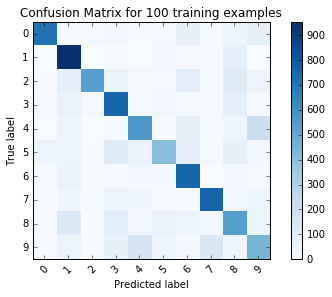

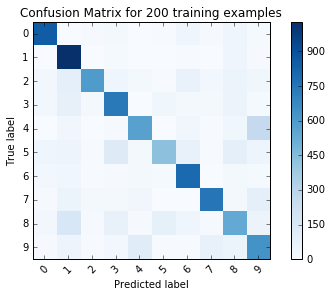

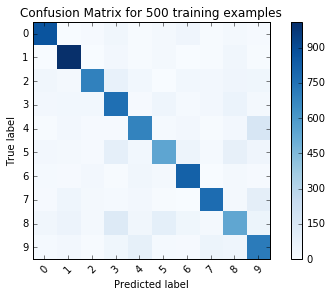

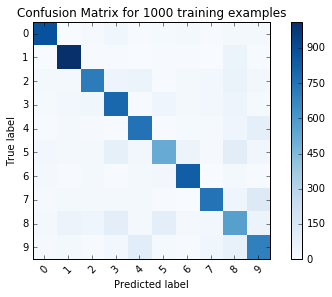

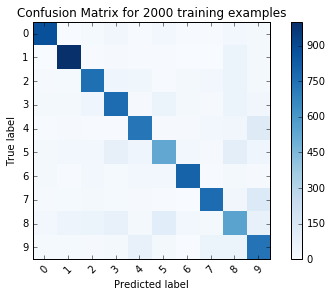

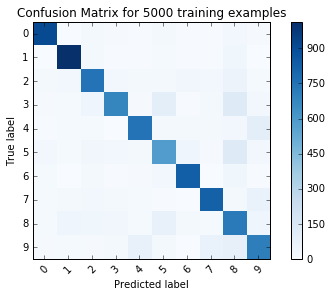

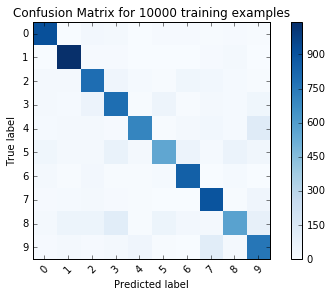

In [20]:
for i in range(len(digit_predictions)):
    problem2(digit_predictions[i], validation_digit_labels, training_numbers[i])


In [21]:
def cross_validation(k_fold, train_images_input, train_labels_input, C_parameter=1):
    clf_cross_validation = svm.LinearSVC(C=C_parameter)
    train_images_shuffled, train_labels_shuffled = shuffle(train_images_input,train_labels_input)
    reduced_training_images = train_images_shuffled[0:10000,:]
    reduced_training_labels = train_labels_shuffled[0:10000]
    #print(reduced_training_labels)
    partition_size = len(reduced_training_labels)/k_fold
    #print(partition_size)
    validation_accuracy = 0
    for i in range(k_fold):
        validation_set = reduced_training_images[i*partition_size:((i+1)*partition_size),:]
        validation_labels = reduced_training_labels[i*partition_size:((i+1)*partition_size),0]
        #print(validation_set.shape)
        training_set = reduced_training_images[0:i*partition_size,:]
        training_set = np.append(training_set,reduced_training_images[((i+1)*partition_size):,:], axis=0)
        #print(training_set.shape)
        training_labels = reduced_training_labels[0:i*partition_size,0]
        training_labels = np.append(training_labels,reduced_training_labels[((i+1)*partition_size):,0])
        #print(len(training_set),len(training_labels))
        clf_cross_validation.fit(training_set, training_labels)
        predicted_labels = clf_cross_validation.predict(validation_set)

        err_rate=benchmark(predicted_labels, validation_labels)
        #print(err_rate)
        validation_accuracy += err_rate
    return validation_accuracy/k_fold

In [24]:
def problem3(training_digits, training_digit_labels, test_digits):
    #inputs are fully formatted training digit images and labels as well as the testing images
    #Important that test digits are correctly formatted (need to tranpose before flattening to be same orientation as training digits)
    C_values = [1E-11, 1E-10, 1E-9,1E-8,1E-7,1E-6,1E-5,1E-4,1E-3,1E-2,1E-1,1, 10, 100, 1000]
    error_rates = []
    for C in C_values:
        error_rates.append(cross_validation(10,training_digits, training_digit_labels, C))
        
    plt.scatter(np.log10(C_values), error_rates)
    plt.xlabel('Log10(C)')
    plt.ylabel('Validation Error Rate')
    plt.title('Validation Error of Digit Classifier for Different C values')
    C_optimal = C_values[error_rates.index(min(error_rates))]
    
    
    train_images_shuffled, train_labels_shuffled = shuffle(training_digits,training_digit_labels)
    reduced_training_images = train_images_shuffled[0:10000,:]
    reduced_training_labels = train_labels_shuffled[0:10000,0]
    
    optimal_digit_clf = svm.LinearSVC(C=C_optimal)
    optimal_digit_clf.fit(reduced_training_images, reduced_training_labels)
    
    digit_predictions = optimal_digit_clf.predict(test_digits)
    print('The optimal C value is ' +str(C_optimal) + ' with a validation error rate of ' +str(min(error_rates)))
    return digit_predictions

The optimal C value is 1e-06 with a validation error rate of 0.1416


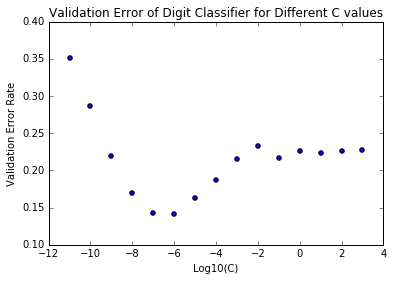

In [25]:
digit_predictions = problem3(train_images_digits, train_labels_digits, test_image_digits)

In [26]:
def write2csv(filename, prediction_labels):
    #Writes an array of labels to a csv file in format specified on Kaggle
    #Example:
    # Id,Category
    # 1,2
    # 2,4
    # ..
    import csv
    with open(filename, 'wb') as csvfile:
        label_writer = csv.writer(csvfile, delimiter = ',')
        label_writer.writerow(['Id','Category'])
        for i in range(len(prediction_labels)):
            label_writer.writerow([i+1,prediction_labels[i]])

In [37]:
def problem4(spam_data, spam_data_labels, testing_spam):
    #Inputs are spam data and labels provided by spam_data.mat
    C_values = [1E-11, 1E-10, 1E-9,1E-8,1E-7,1E-6,1E-5,1E-4,1E-3,1E-2,1E-1,1, 10, 100, 1000]
    spam_error_rates = []
    for C in C_values:
        spam_error_rates.append(cross_validation(6,spam_data,spam_data_labels,C))
        
    C_optimal = C_values[spam_error_rates.index(min(spam_error_rates))]
    print('The optimal C value is ' +str(C_optimal) + ' with a validation error rate of ' +str(min(spam_error_rates)))
    optimal_spam_clf = svm.LinearSVC(C=C_optimal)
    optimal_spam_clf.fit(spam_data, spam_data_labels[:,0])
    
    predicted_spam = optimal_spam_clf.predict(testing_spam)
    return predicted_spam

In [38]:
predicted_spam = problem4(spam_training, spam_training_labels, spam_test)
write2csv('spam_predictions.csv', predicted_spam)

The optimal C value is 100 with a validation error rate of 0.187161639598
